In [3]:
import requests
import cv2
from matplotlib import pyplot as plt 
import numpy as np

## Laplacian of Gaussian
The Laplacian of Gaussian (LoG) is an image processing operation that involves two basic operations: smoothing (convolution with a Gaussian filter) and computing the Laplacian (second derivative) of the resulting smoothed image

Mathematically. if $I$ is the orginal image, $G_\sigma$ is the 2D Gaussian function, and $\nabla^2$ represents the Laplacian operator, the Laplacian of Gaussian (LoG) is given by:

$LoG\{I\} =  \nabla^2 (G_\sigma * I) = (\nabla^2 G_\sigma) * I$

$\nabla^2 G_\sigma = -\frac{1}{\pi \sigma^4}[1 - \frac{x^2+y2}{2\sigma^2}] \exp(- \frac{x^2+y2}{2\sigma^2})$

This means that we can use the following two equivalent ways to compute the LoG of the image.

- compute the LoG by first obtaining the LoG kernel and convolving that with the image: $(\nabla^2 G_\sigma) * I$

- computes the LoG by two sequential operations: blurring an image with a Gaussian filter and then applying the Laplacian operator: $\nabla^2 (G_\sigma * I)$

This equivalence is possible because convolution, the mathematical operation involved in both processes, is commutative. Essentially, whether you blur the image first and then apply the Laplacian or vice versa, the end result is the same. 



**Computes the LoG by two sequential operations: blurring an image with a Gaussian filter and then applying the Laplacian operator**
[Additional Reading](https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html)\
[Additional Reading](https://theailearner.com/tag/cv2-laplacian/)

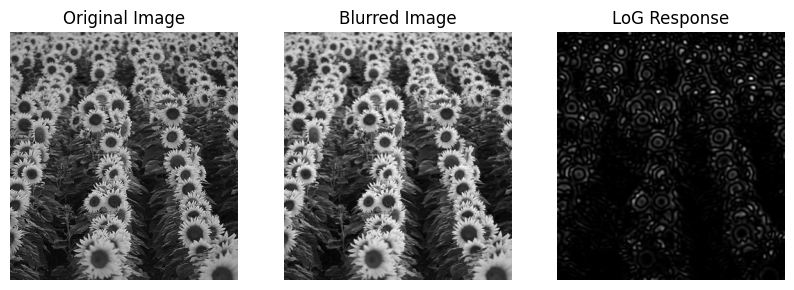

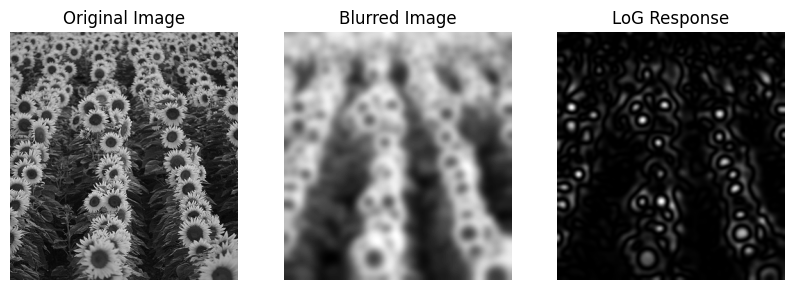

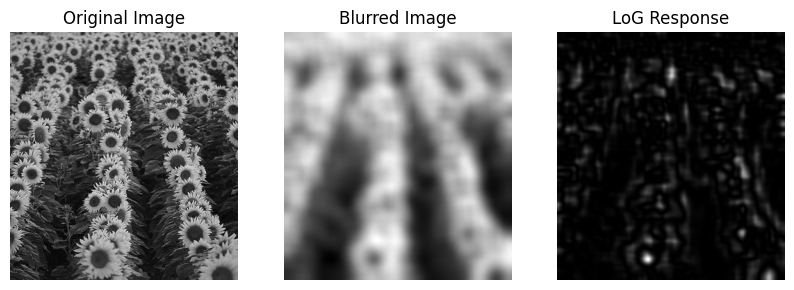

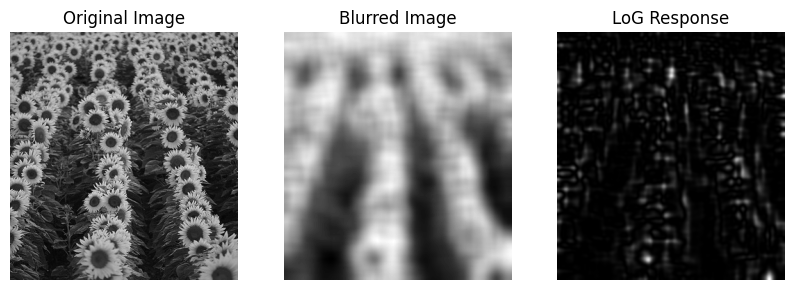

In [143]:
# Read the image
image = cv2.imread('data/images/sunflowers.jpg', cv2.IMREAD_GRAYSCALE)
ksize = 31

responses = []

# compute LoG response at various sigma values
for i, sigma in enumerate(np.arange(0.5,20)):
    # Blur the image using Gaussian kernel
    blur_image = cv2.GaussianBlur(image, ksize=(ksize,ksize), sigmaX = sigma, sigmaY = sigma)
     
    # Apply the laplacian 
    response = cv2.Laplacian(blur_image, cv2.CV_32F, ksize=ksize, scale=sigma)
    
    # Squared response
    response = response**2

    responses.append(response)

    # plot every 5th response
    if i % 5 == 0:    
        # Display the original image and the edges obtained with the custom kernel
        plt.figure(figsize = (10,5))
        plt.subplot(1,3,1)
        plt.imshow(image, cmap='gray')
        plt.title('Original Image'), plt.axis('off')
        
        plt.subplot(1,3,2)
        plt.imshow(blur_image, cmap='gray')
        plt.title('Blurred Image'), plt.axis('off')
        
        plt.subplot(1,3,3)
        plt.imshow(response, cmap='gray')
        plt.title('LoG Response'), plt.axis('off') 

responses = np.array(responses)

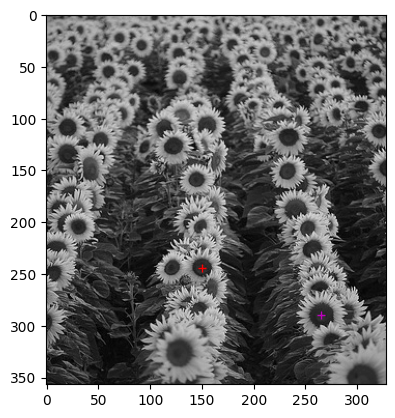

In [167]:
# Lets focus on the following two blobs and look at the response values
plt.imshow(image, cmap='gray')
plt.plot(150,244, 'r+')
plt.plot(265,290, 'm+')

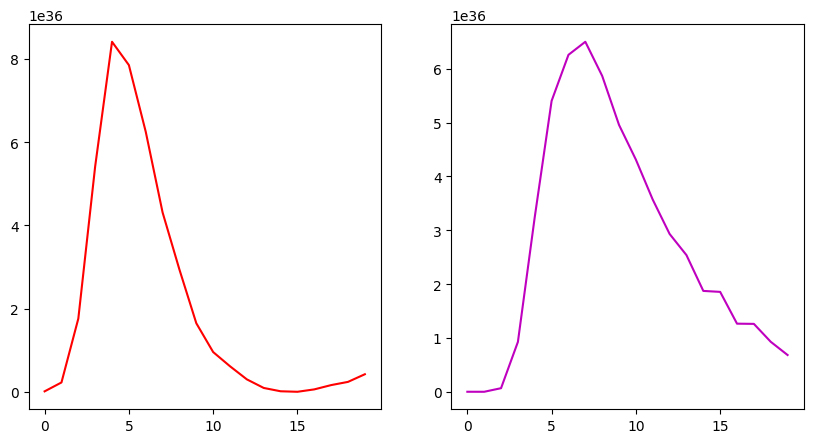

In [166]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(responses[:,244,150],'r-')
plt.subplot(122)
plt.plot(responses[:,290,265],'m-')

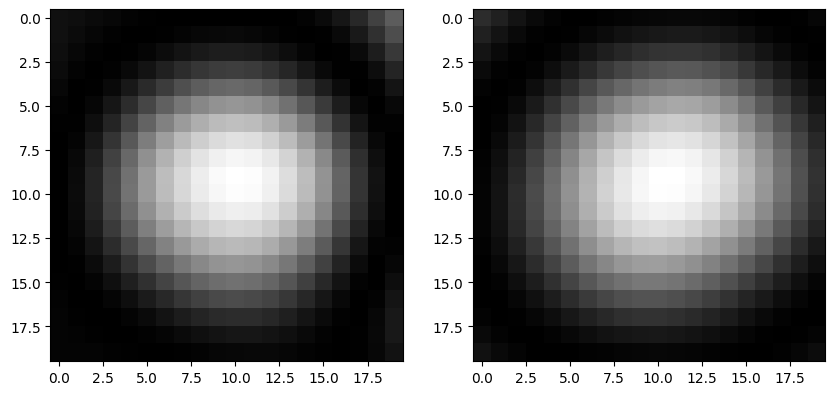

In [165]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(responses[4,244-10: 244+10,150-10:150+10],cmap='gray')
plt.subplot(122)
plt.imshow(responses[6,290-10:290+10,265-10:265+10],cmap='gray')

In [168]:
# The two blobs are located at (244, 150, 4) and (290, 265, 6)